# 캘리포니아 주택가격 예측

## 1. 데이터 가져오기

* Download the DataSet

In [11]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(DOWNLOAD_ROOT, HOUSING_PATH, HOUSING_URL, end='\n')

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    #예외 처리. 경로 없을 시 경로 생성    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

https://raw.githubusercontent.com/ageron/handson-ml2/master/ datasets\housing https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [6]:
fetch_housing_data()

In [13]:
import pandas as pd

# 데이터셋 로딩 함수(return = 데이터 프레임)
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

####  변수 설명

* longitude
* latitude
* housing_median_age	
* total_rooms
* 변수 이어서 작성(변수 의미 알아오기



In [14]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
housing["longitude"] = housing["longitude"].astype(np.float64)
housing["median_income"] = housing["median_income"].astype(np.float64)

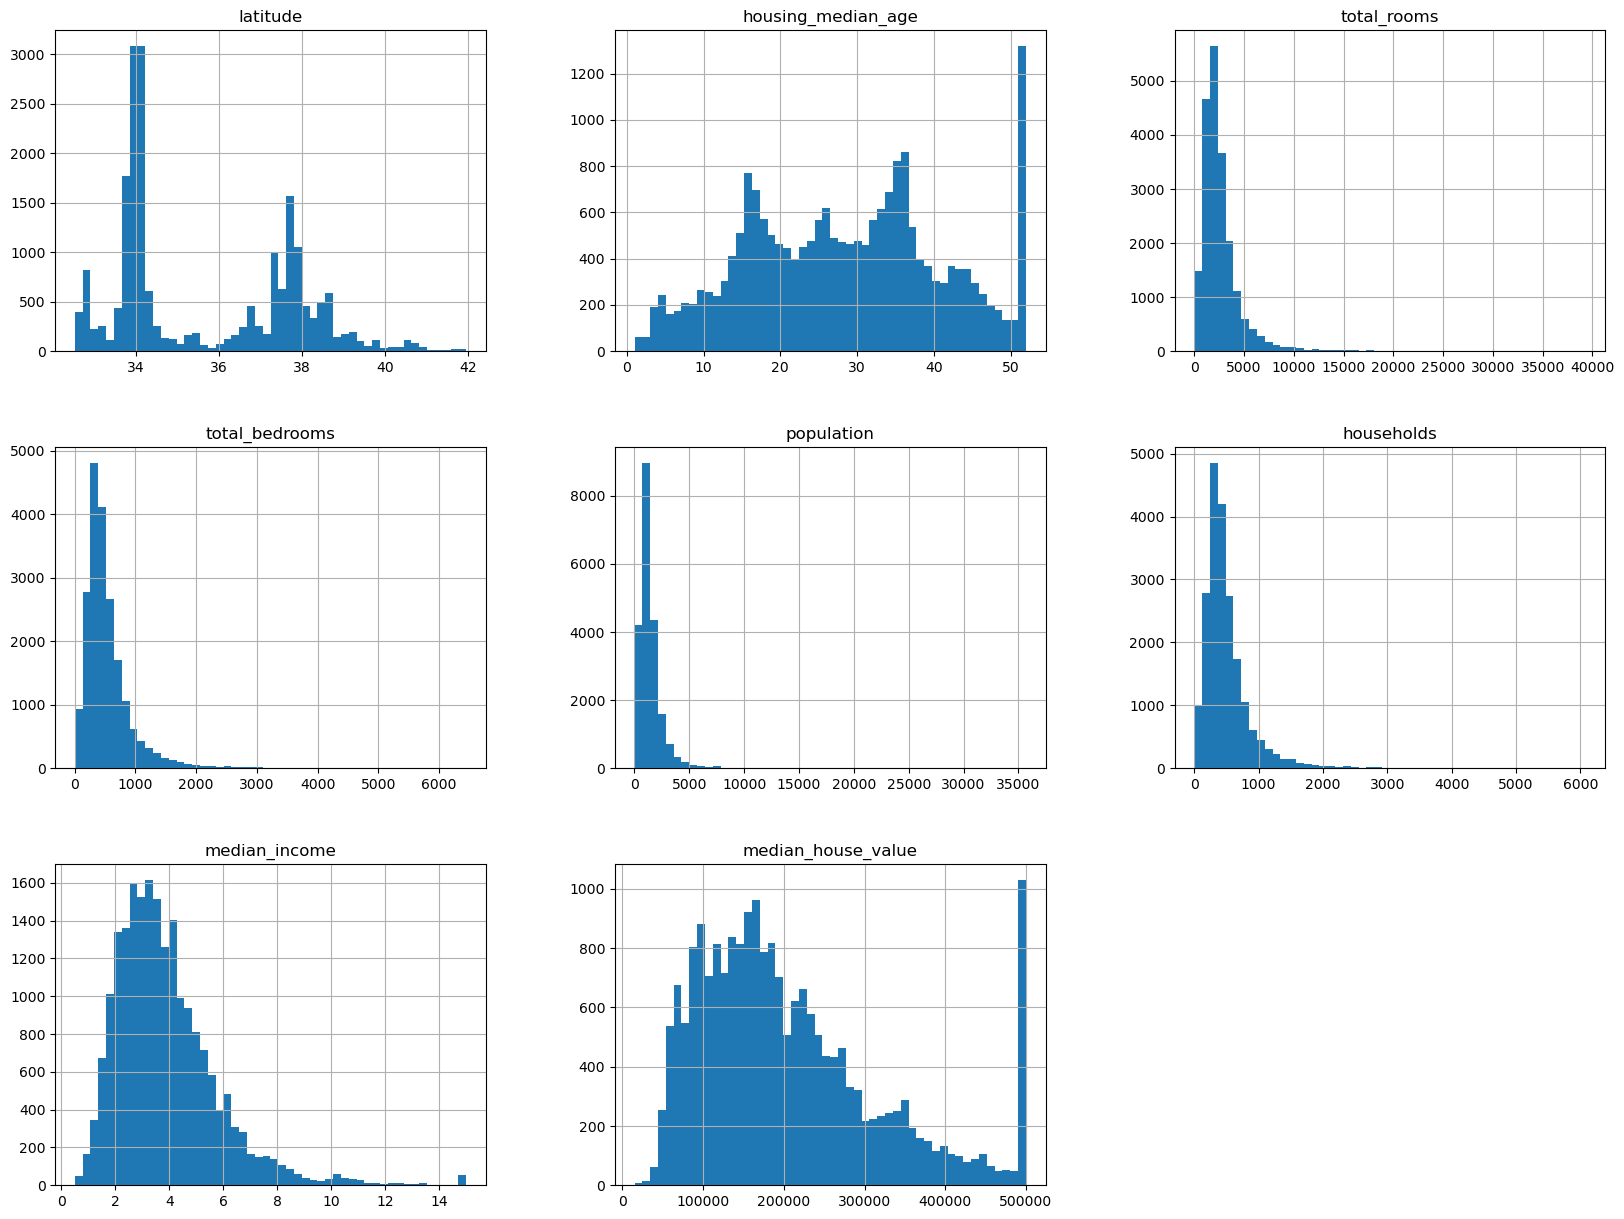

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

#히스토그램 작성
housing.hist(bins = 50, figsize=(20, 15))
plt.show()

In [25]:
import numpy as np

np.random.seed(42)

In [26]:
def split_train_test(data: pd.DataFrame, test_ratio: float= 0.2) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    shuffled_indices = np.random.permutation(len(data))
    testset_size = int(len(data)*test_ratio) #인덱싱을 위해서 정수 전환
    test_indices = shuffled_indices[:testset_size]
    train_indices = shuffled_indices[testset_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [31]:
#전체 데이터셋
print(housing.shape)

trainset, testset = split_train_test(housing, 0.2)

#전체 데이터섹에서 20%만 가져왔는지 확인
print(trainset.shape, testset.shape)

(20640, 10)
(16512, 10) (4128, 10)


# conda install 

In [32]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(housing, test_size=0.2, random_state=42)
print(trainset.shape, testset.shape)

(16512, 10) (4128, 10)


In [47]:
# 데이터가 정규분포를 따르도록 값 변경

housing["income_cat"] = pd.cut(
    housing["median_income"],
                              
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                              
    labels=[1, 2, 3, 4, 5]
)
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

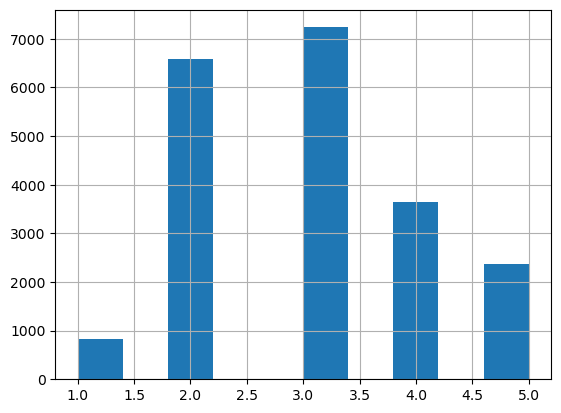

In [44]:
housing["income_cat"].hist()

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_trainset = housing.loc[train_index]
    strat_testset = housing.loc[test_index]

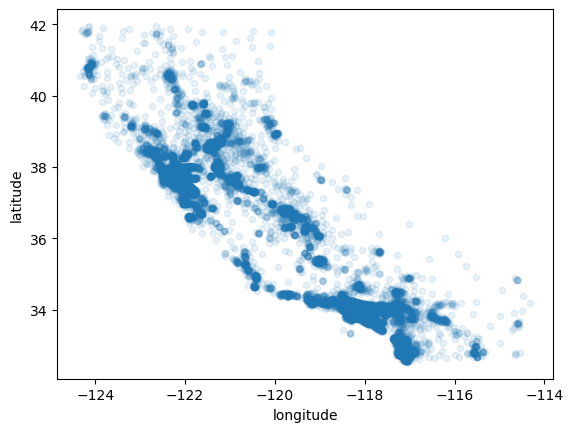

In [54]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)
plt.show()

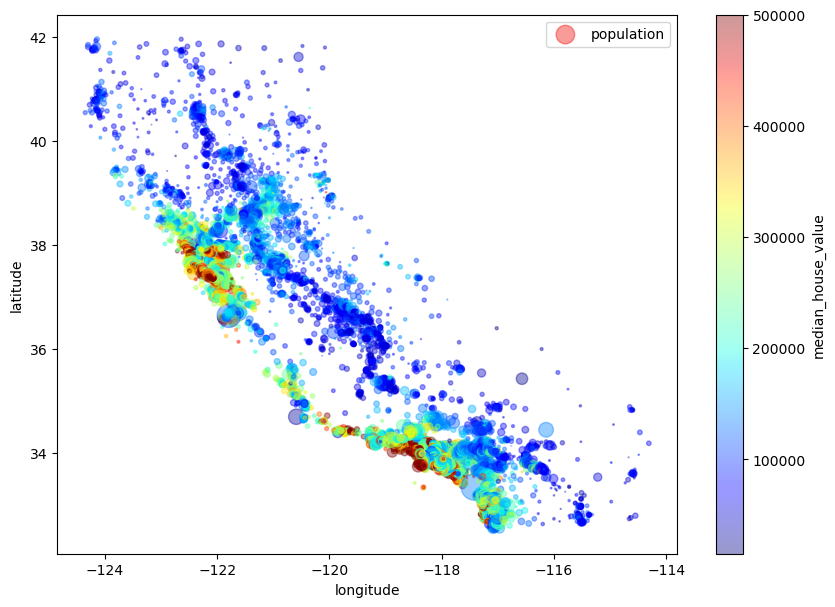

In [56]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
housing.plot(
    kind="scatter", x = "longitude", y = "latitude", alpha = 0.4,
    s = housing["population"]/100, label = 'population', figsize = (10, 7),
    c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
    sharex = False
)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import

